In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir("/Users/Sarah/Desktop")
csv_read = pd.read_csv("blood_markers.csv")
from collections import Counter
from imblearn.over_sampling import SMOTE

In [13]:
#csv_read.shape

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

csv_read.dropna(inplace=True)
csv_read = csv_read[~csv_read['Group'].isin(['analysis error/unclassifiable', 'insuff follow-up'])]
csv_read['Group'].replace('PSE', 'epilepsy', inplace=True)


features = ['S100', 'NSEV', 'GFAP', 'NFL', 'Tau']
X = csv_read.loc[:, ['S100', 'NSEV', 'GFAP', 'NFL', 'Tau']].values
y = csv_read.loc[:,['Group']].values
#print(X)

In [15]:
#print(csv_read['Group'])
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)


from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_scaled)
principalDF = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
FinalDF = pd.concat([principalDF, csv_read['Group']], axis = 1)
FinalDF.dropna(inplace=True)
#print(FinalDF)

(61, 5)


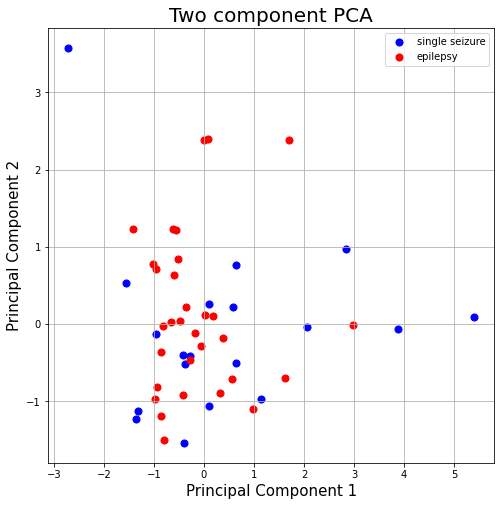

In [16]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)

targets = ['single seizure', 'epilepsy']
colors = ['b', 'r']
for Group, color in zip(targets,colors):
    indicesToKeep = FinalDF['Group'] == Group
    ax.scatter(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [17]:
pca.explained_variance_ratio_

array([0.35247955, 0.20728329])